# Dataanalyse



<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

I denne delen av prosjektet videreutvikles analysen av miljødata ved hjelp av sentrale verktøy innen dataanalyse og visualisering. Gjennom bruk av NumPy og Pandas skal det beregnes statistiske mål som gjennomsnitt og standardavvik for å identifisere mønstre og variasjoner i datasettet. Deretter benyttes Matplotlib til å utforme informative visualiseringer som støtter tolkningen av funnene. Til slutt gjennomføres en prediktiv analyse – i egen notebook-fil – ved hjelp av lineær og polynomisk regresjon, med mål om å modellere og forutsi fremtidige miljøforhold basert på historiske data.
</div>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))


Ved hjelp av NumPy og Pandas vil vi nå regne ut gjennomsnitt, standard avvik og median til værdataen vår.

In [2]:
from statistikk_funksjoner import beregn_statistikk, last_inn_data

df = last_inn_data("../data/BehandletVaerData.csv")

plot_temp = beregn_statistikk(df, "air_temperature P1D", "lufttemperatur")
plot_vind = beregn_statistikk(df, "wind_speed P1D", "vindstyrke")
plot_nedbor = beregn_statistikk(df, "precipitation_amount P1D", "nedbør")



Statistiske værdata for lufttemperatur per by:
           gjennomsnitt  median  standardavvik
by                                            
Bergen             8.92     9.5           5.33
Oslo               7.82     8.6           7.50
Trondheim          5.62     5.8           7.13

Statistiske værdata for vindstyrke per by:
        gjennomsnitt  median  standardavvik
by                                         
Bergen          3.57     3.3           1.67
Oslo            2.63     2.5           0.98

Statistiske værdata for nedbør per by:
           gjennomsnitt  median  standardavvik
by                                            
Bergen             6.71     1.5          10.11
Oslo               1.93     0.0           4.50
Trondheim          2.67     0.5           4.55


<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

## Kommentering av statistiske data
### Lufttemperatur

Gjennomsnittstemperaturen er høyest i Bergen (8.92 °C), etterfulgt av Oslo (7.82 °C) og Trondheim (5.62 °C). Medianverdiene følger samme rekkefølge, noe som tyder på at temperaturfordelingen er relativt symmetrisk. Standardavviket er imidlertid høyest i Oslo (7.50), noe som indikerer at temperaturene i Oslo varierer mer gjennom året sammenlignet med de to andre byene. Dette kan skyldes at Oslo har et mer kontinentalt klima, mens Bergen og Trondheim har et jevnere og mildere kystklima.

### Vindstyrke

Bergen har høyest gjennomsnittlig vindstyrke (3.57 m/s), mens Oslo har lavest (2.63 m/s). Medianverdiene er tilsvarende, og standardavviket i Bergen (1.67) viser at vindforholdene varierer mer der enn i Oslo (0.98). Dette er i tråd med geografiske og klimatiske forhold, hvor Bergen som kystby er mer utsatt for værsystemer og vind.

### Nedbør

Nedbøren varierer kraftig mellom byene. Bergen skiller seg markant ut med et gjennomsnitt på 6.71 mm og et høyt standardavvik (10.11), noe som bekrefter byens rykte som en av Norges mest nedbørsrike byer. Medianen på 1.5 mm viser imidlertid at det ofte er mange dager med lite nedbør, men at enkelte dager med kraftig nedbør trekker gjennomsnittet kraftig opp. I Oslo og Trondheim er både gjennomsnitt og standardavvik lavere, og medianverdiene på henholdsvis 0.0 og 0.5 mm indikerer at det ofte er helt nedbørsfrie dager i disse byene.
</div>


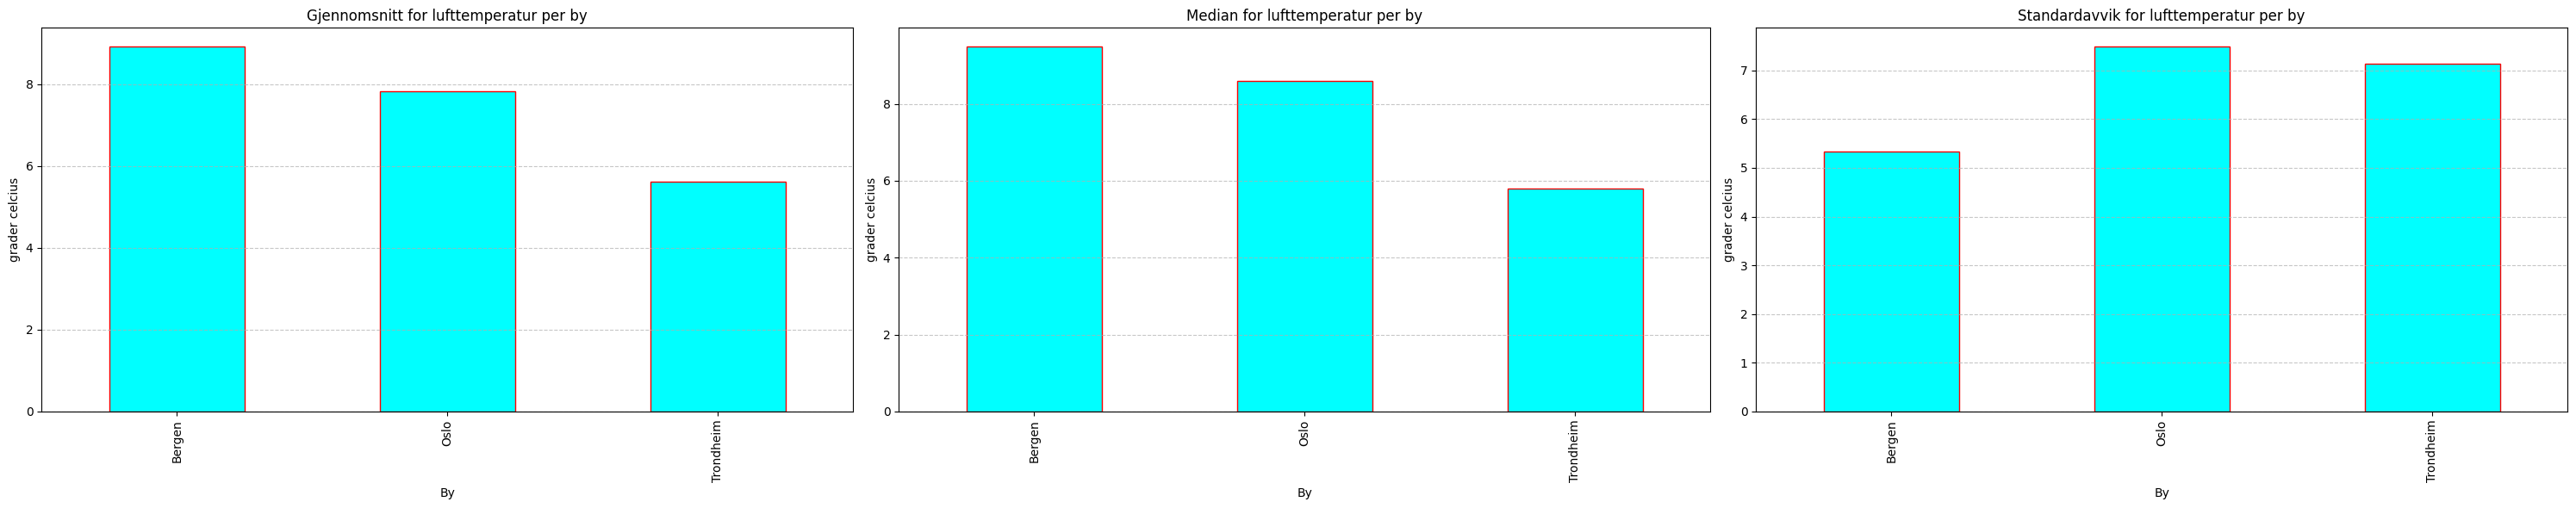

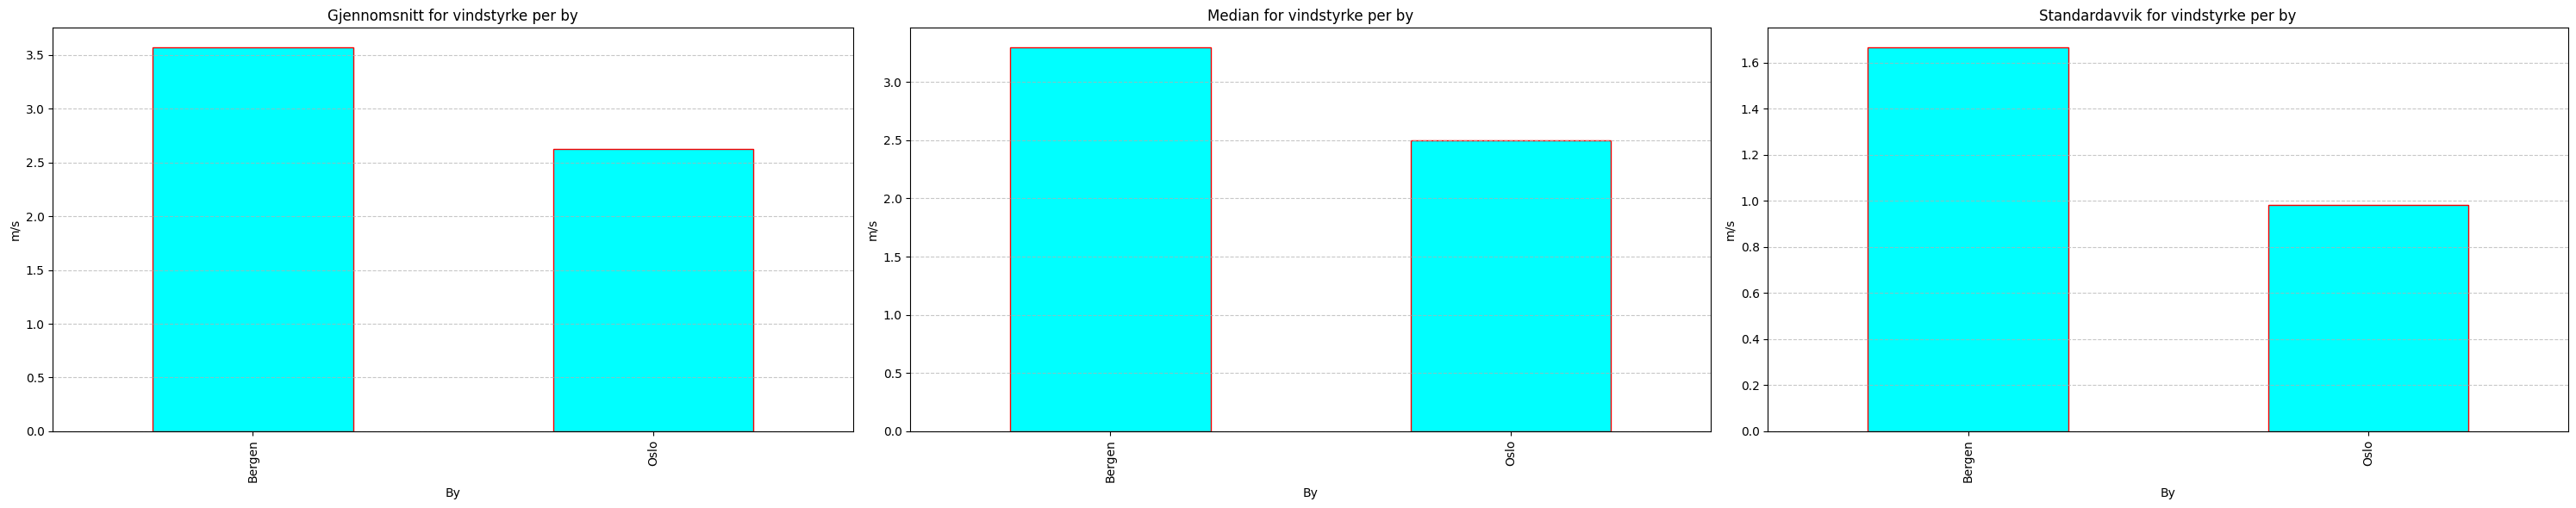

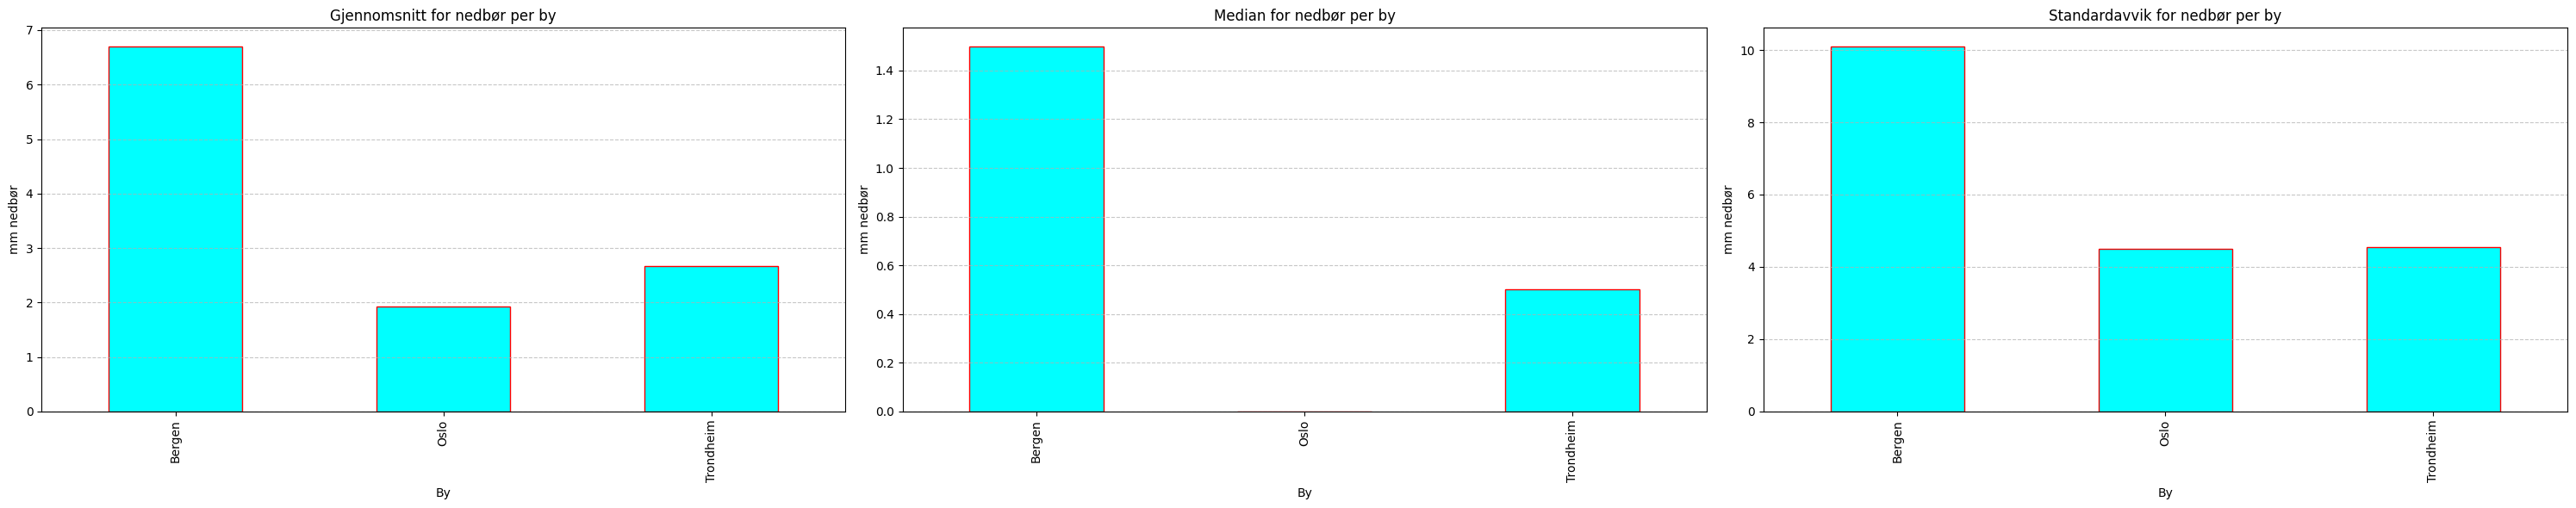

In [3]:
from statistikk_funksjoner import plott_statistikk
# Kaller på plott_statitstikk funksjonen for å lage plott av statistikken som viser median, std.avik og 
# gjennomsnitt for nedbør, vindstyrke og lufttemperatur
plott_statistikk(plot_temp, ["gjennomsnitt", "median", "standardavvik"], "lufttemperatur")
plott_statistikk(plot_vind, ["gjennomsnitt", "median", "standardavvik"], "vindstyrke")
plott_statistikk(plot_nedbor, ["gjennomsnitt","median", "standardavvik"], "nedbør")


# Analyse av sammenhengen mellom variabler 




Korrelasjon mellom 'air_temperature P1D' og 'wind_speed P1D' i Oslo:
Korrelasjonskoeffisient (r): 0.06
P-verdi: 0.2458


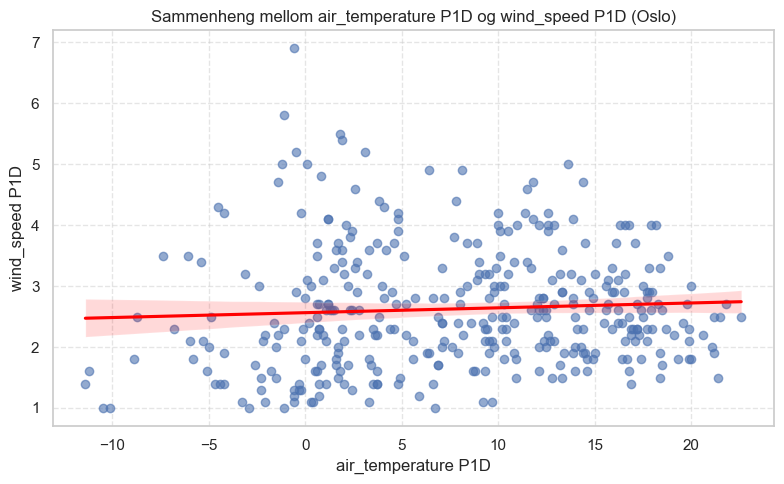


Korrelasjon mellom 'air_temperature P1D' og 'wind_speed P1D' i Bergen:
Korrelasjonskoeffisient (r): 0.02
P-verdi: 0.6608


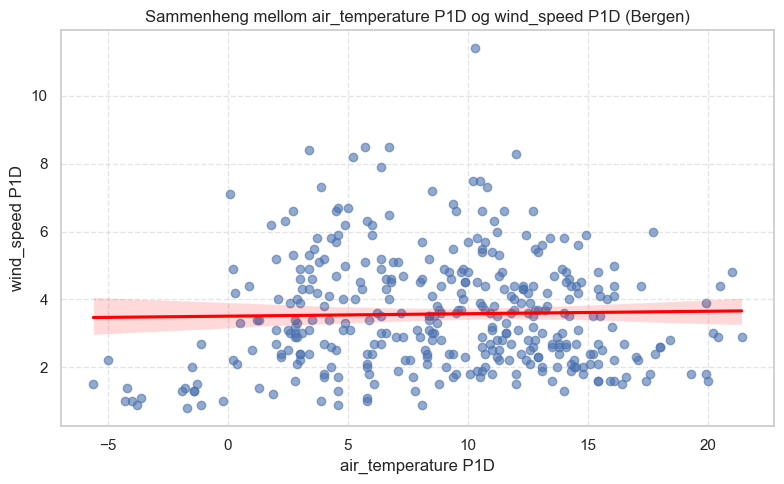

Ingen overlappende data for valgte variabler.


In [4]:
from statistikk_funksjoner import undersok_korrelasjon

# Her undersøker vi korrelasjonen mellom lufttemperatur og vindstyrke i Oslo, Bergen og Trondheim
undersok_korrelasjon(df, "air_temperature P1D", "wind_speed P1D", by="Oslo")
undersok_korrelasjon(df, "air_temperature P1D", "wind_speed P1D", by="Bergen")
undersok_korrelasjon(df, "air_temperature P1D", "wind_speed P1D", by="Trondheim")

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Kommentar til analyse av sammenheng mellom Temperatur og Vindstyrke
Analysen av sammenhengen mellom daglig lufttemperatur og daglig vindhastighet viser svært svake korrelasjoner på tvers av de tre byene. I Oslo ble det funnet en korrelasjon på 0.06 med en p-verdi på 0.2458, som indikerer at det ikke er noen signifikant sammenheng mellom temperatur og vindhastighet i denne byen. I Bergen er korrelasjonen enda svakere, med en verdi på 0.02 og en p-verdi på 0.6608, noe som også tyder på at det ikke er noen statistisk signifikant sammenheng. For Trondheim er det ikke tilgjengelige data for de valgte variablene, og derfor kan ingen analyse gjennomføres for denne byen. Samlet sett viser resultatene at det ikke er noen signifikant lineær sammenheng mellom temperatur og vindhastighet i de undersøkede byene, noe som tyder på at andre faktorer, som værsystemer eller topografi, kan være mer avgjørende for vindforholdene i disse områdene.
</div>


Korrelasjon mellom 'air_temperature P1D' og 'precipitation_amount P1D' i Oslo:
Korrelasjonskoeffisient (r): 0.11
P-verdi: 0.0443


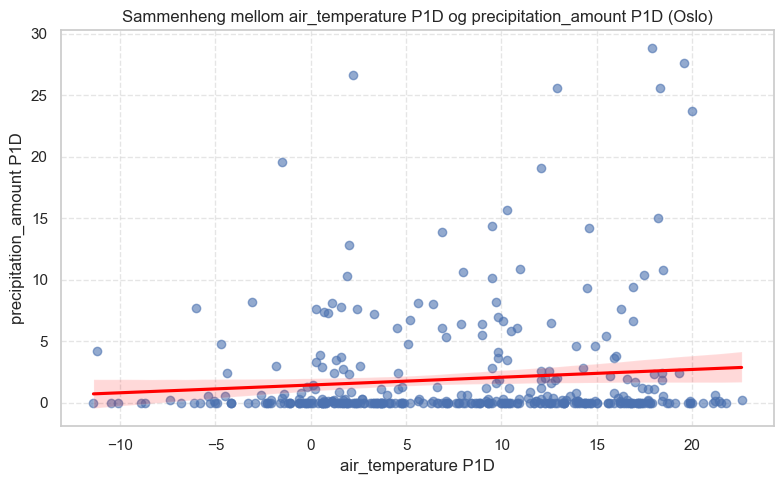


Korrelasjon mellom 'air_temperature P1D' og 'precipitation_amount P1D' i Bergen:
Korrelasjonskoeffisient (r): -0.05
P-verdi: 0.3102


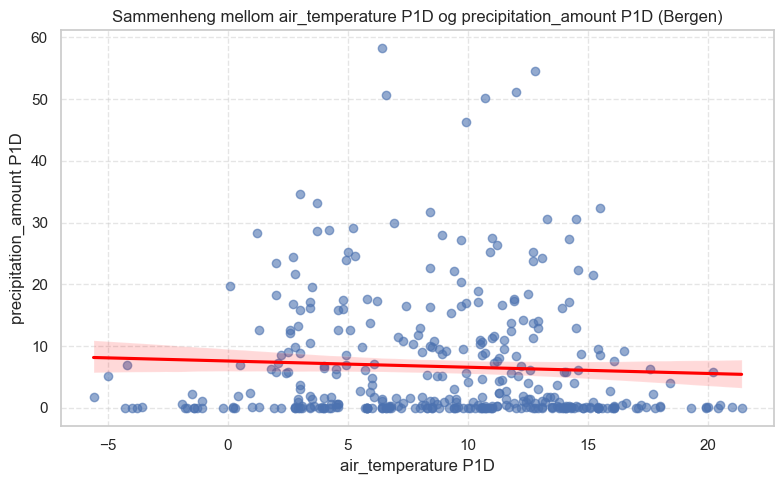


Korrelasjon mellom 'air_temperature P1D' og 'precipitation_amount P1D' i Trondheim:
Korrelasjonskoeffisient (r): 0.00
P-verdi: 0.9405


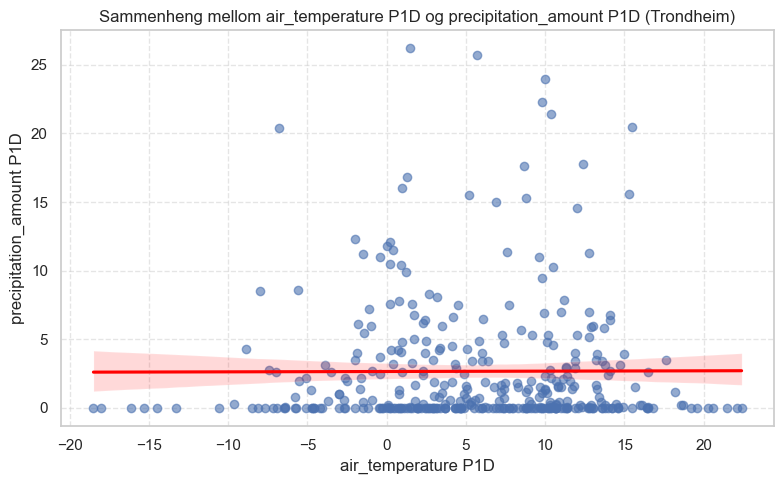

In [5]:
# Her undersøker vi korrelasjonen mellom lufttemperatur og nedbør i Oslo, Bergen og Trondheim
undersok_korrelasjon(df, "air_temperature P1D", "precipitation_amount P1D", by="Oslo")
undersok_korrelasjon(df, "air_temperature P1D", "precipitation_amount P1D", by="Bergen")
undersok_korrelasjon(df, "air_temperature P1D", "precipitation_amount P1D", by="Trondheim")

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Kommentar til analyse av sammenheng mellom Temperatur og Nedbør 

Analysen av sammenhengen mellom daglig lufttemperatur og daglig nedbør i de tre byene viser varierende resultater. For Oslo ble det funnet en svakt positiv korrelasjon på 0.11, med en p-verdi på 0.0443, noe som indikerer en statistisk signifikant, men svært svak sammenheng. Dette antyder at det kan være en liten tendens til at høyere temperaturer er assosiert med økt nedbør, men forholdet er ikke sterkt. I Bergen og Trondheim derimot, er korrelasjonene nær null, med p-verdier på 0.3102 og 0.9405. Dette tyder på at det ikke er noen signifikant sammenheng mellom temperatur og nedbør i disse byene, og eventuelle sammenhenger kan være tilfeldig. Samlet sett kan vi konkludere med at temperaturens påvirkning på nedbør er svak og variabel, og at andre faktorer trolig spiller en større rolle i nedbørsdannelsen i disse områdene.
</div>


Korrelasjon mellom 'wind_speed P1D' og 'precipitation_amount P1D' i Oslo:
Korrelasjonskoeffisient (r): 0.01
P-verdi: 0.7877


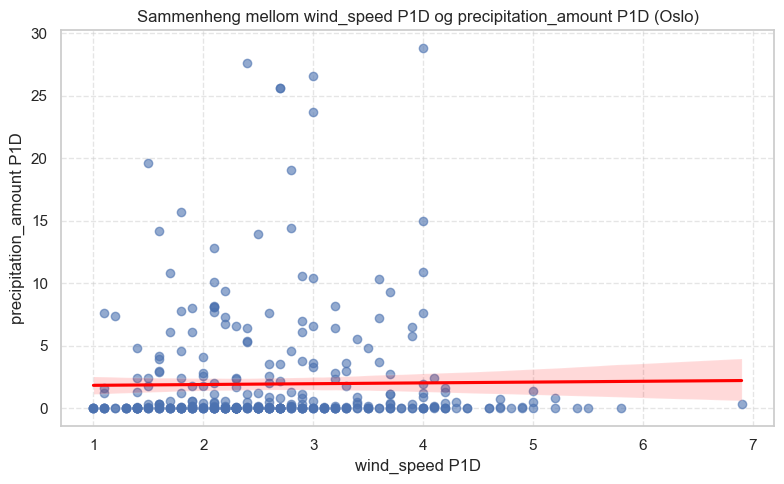


Korrelasjon mellom 'wind_speed P1D' og 'precipitation_amount P1D' i Bergen:
Korrelasjonskoeffisient (r): 0.20
P-verdi: 0.0002


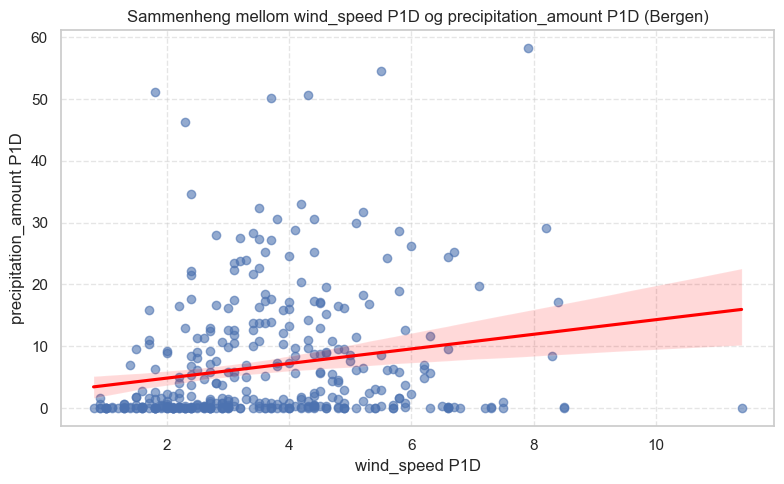

Ingen overlappende data for valgte variabler.


In [6]:
# Her undersøker vi korrelasjonen mellom vindstyrke og nedbør i Oslo, Bergen og Trondheim
undersok_korrelasjon(df, "wind_speed P1D", "precipitation_amount P1D", by="Oslo")
undersok_korrelasjon(df, "wind_speed P1D", "precipitation_amount P1D", by="Bergen")
undersok_korrelasjon(df, "wind_speed P1D", "precipitation_amount P1D", by="Trondheim")

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Kommentar til analyse av sammenhengen mellom Vind og Nedbør 
Analysen av sammenhengen mellom daglig vindhastighet og daglig nedbør viser betydelige forskjeller mellom byene. I Oslo ble det funnet en svært svak korrelasjon på 0.01 med en p-verdi på 0.7877, som indikerer at det ikke er noen signifikant sammenheng mellom vindhastighet og nedbør i denne byen. I Bergen derimot, er korrelasjonen betydelig høyere på 0.20, og p-verdien på 0.0002 indikerer en statistisk signifikant sammenheng. Dette kan tyde på at det er en svak positiv sammenheng mellom vindhastighet og nedbør i Bergen, som kan reflektere lokale værforhold eller klimatiske mønstre i denne regionen. For de valgte variablene i Trondheim er det ingen tilgjengelige data for analyse. Samlet sett viser resultatene at vindhastighet har en minimal sammenheng med nedbør i Oslo, men en signifikant sammenheng i Bergen, noe som kan være relatert til spesifikke værfenomener i denne byen.
</div>


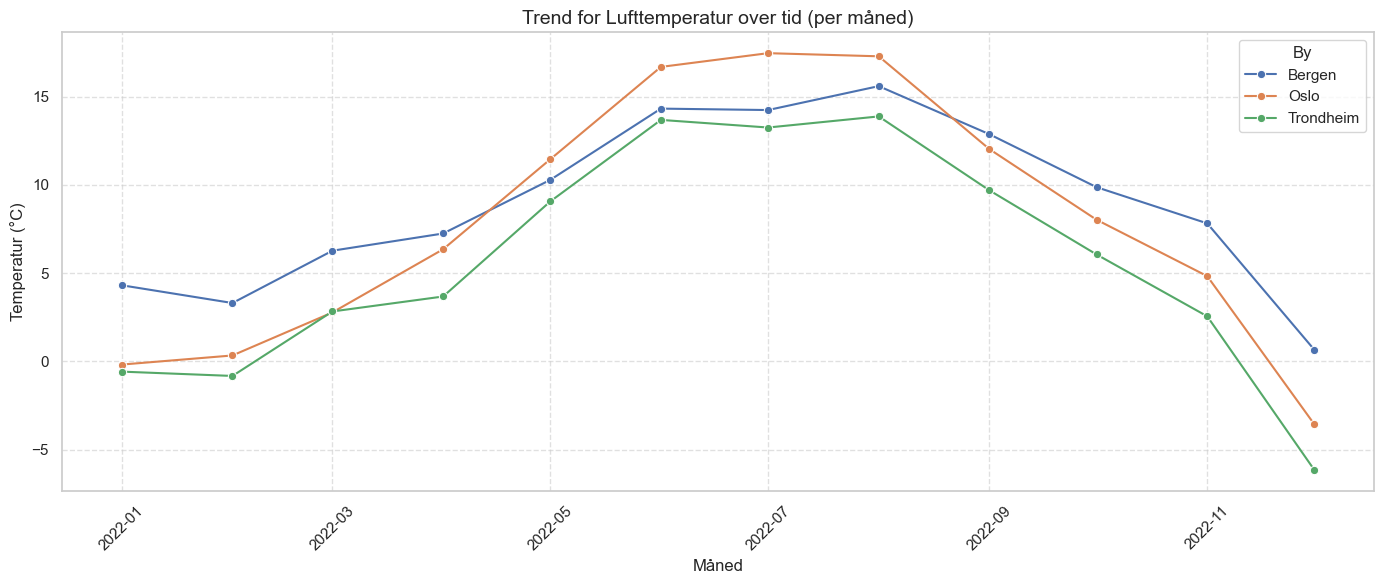

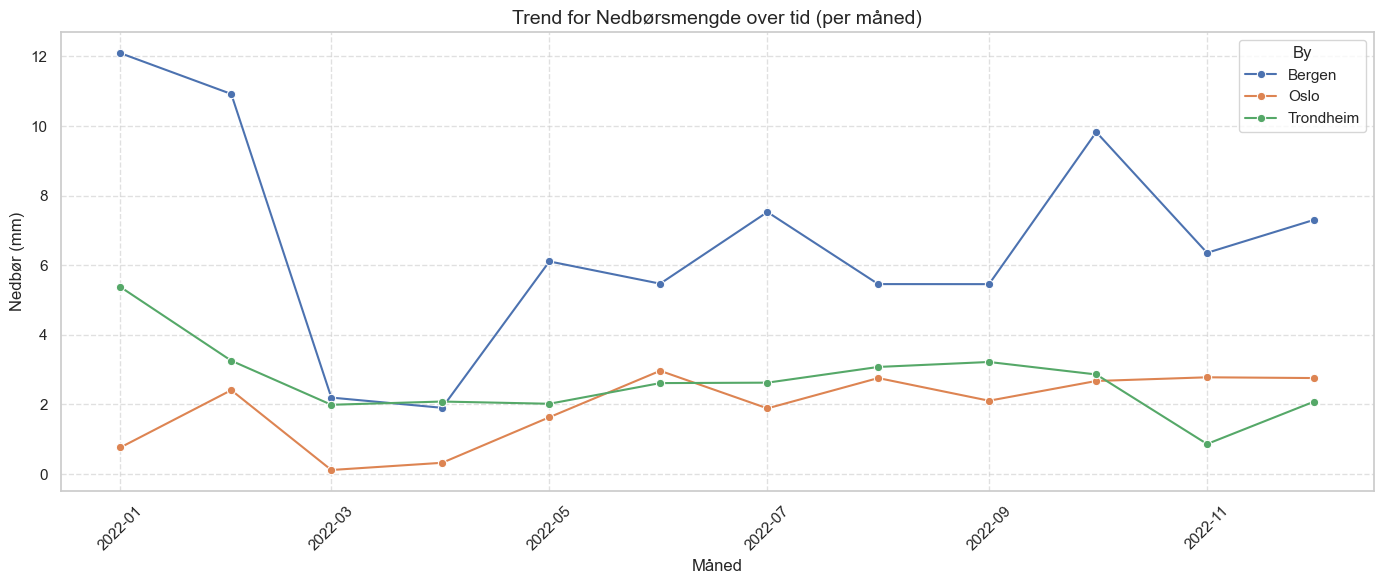

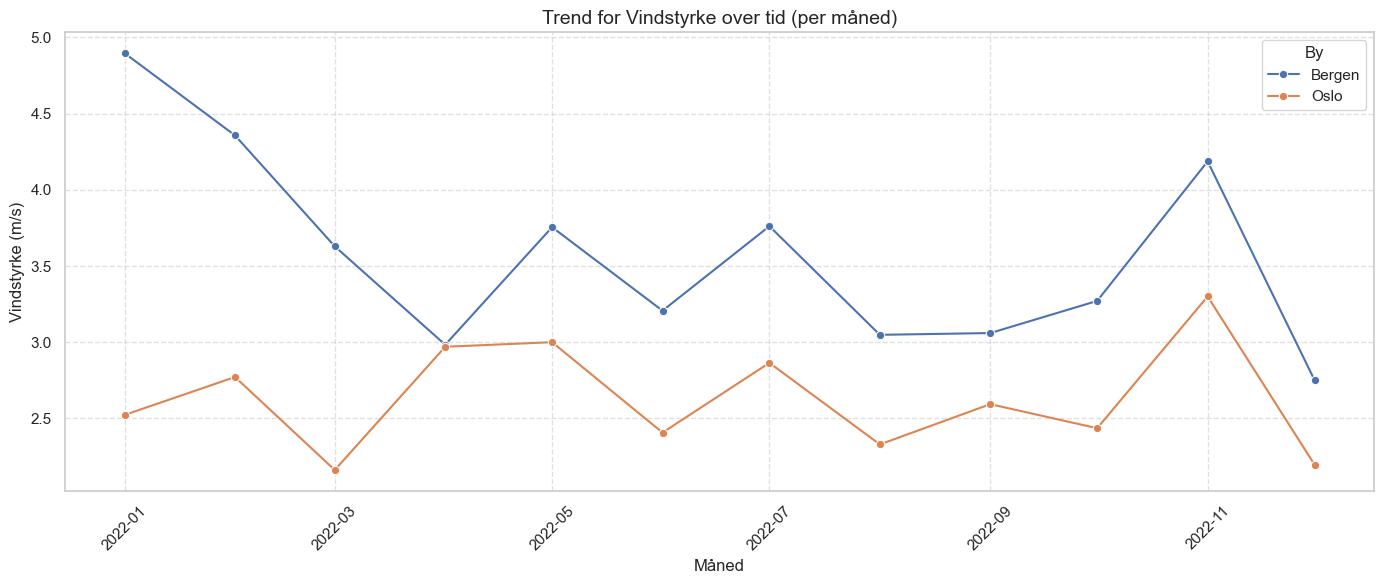

In [7]:
from statistikk_funksjoner import plott_trend_over_tid
# Kaller på plott_trend_over_tid funksjonen for å lage plott av trend over tid for nedbør, vindstyrke og lufttemperatur
plott_trend_over_tid(df, variabelnavn = "air_temperature P1D", visningsnavn = "Lufttemperatur")
plott_trend_over_tid(df, variabelnavn = "precipitation_amount P1D", visningsnavn = "Nedbørsmengde")
plott_trend_over_tid(df, variabelnavn = "wind_speed P1D", visningsnavn = "Vindstyrke")

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>
Disse grafene viser månedlig gjennomsnittstemperatur, gjennomsnittlig nedbørmengde og gjennomsnittlig vindstyrke i Oslo, Bergen og Trondheim gjennom hele 2022. Med disse grafene kan man enkelt identifisere trender, se sesongvariasjoner, forskjeller mellom byene og forstå variasjonen i dataen over tid. Det er nettopp derfor vi har valgt å bruke disse grafene. 
</div>

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

## Interaktive grafer
Under ser vi interaktive grafer som er en slags oppgradering fra de statiske grafene vi laget over. Disse interaktive grafene har vi brukt Plotly for å lage, og de gir oss muligheten til å legge musen på grafen slik at vi da får opp informasjon om de ulike parameterene over tid fra alle dagene i tidsspennet, her i 2022. Vi har laget interaktive grafer for hvert parameter hvor alle byene vises, og vi har også laget en interaktiv graf med to dropdown-bokser for by og parameter slik at man kan velge hva man vil se. Fordelen med dropdown-boksene er at man slipper å ha flere visualiseringer, slik som med interaktiv_trend_plot. Ulempen med det er at man ikke kan se flere grafer samtidig for å sammenligne, men det kan man med interaktiv_trend_plot. Derfor har vi valgt å vise begge. 
</div>

In [8]:
from statistikk_funksjoner import interaktiv_trend_plot

# Kaller på interaktiv_trend_plot funksjonen for å lage interaktive plott av trend over tid for nedbør, vindstyrke og lufttemperatur
interaktiv_trend_plot(df, variabelnavn = "air_temperature P1D", visningsnavn = "Lufttemperatur")
interaktiv_trend_plot(df, variabelnavn = "precipitation_amount P1D", visningsnavn = "Nedbørsmengde")
interaktiv_trend_plot(df, variabelnavn = "wind_speed P1D", visningsnavn = "Vindstyrke")

In [9]:
from statistikk_funksjoner import interaktiv_by_og_variabel_plot

# Kaller på interaktiv_by_og_variabel_plot funksjonen for å lage interaktive plott av nedbør, vindstyrke og lufttemperatur i Oslo, Bergen og Trondheim
interaktiv_by_og_variabel_plot(df)

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Vurderingskriterier for oppgave 5: Visualisering

1. I dette prosjektet har vi laget flere typer visualiseringer, for å gjøre miljødataen vi har samlet og analysert mer forståelige. Vi har laget linjediagram for å vise utviklingen i temperatur, nedbør og vindtstyrke per måned, vi har laget stolpediagram for å vise gjennomsnitt, standardavvik og median for hvert parameter og for hver by, og vi har laget korrelasjonsanalyser visualisert med scatterplots og regresjonslinjer. Som nevnt tidligere har vi valgt å bruke nettopp denne typen visualiseringer fordi disse grafene gjør det enkelt å identifisere trender, se sesongvariasjoner, forskjeller mellom byene og forstå variasjonen i dataen over tid. 

2. Vi har både brukt Matplotlib og Seaborn til å forbedre forståelsen av de analyserte dataene våre. Grovt sett og enkelt sagt vil vi si at Matplotlib og Seaborn brukes til å visualisere data, noe som direkte hjelper på å forstå tydeligere og klarere hva dataen forteller oss. Mer spesifikt har vi brukt Matplotlib til å styre detaljer som akseetiketter, titler og layout, og Seaborn til å lage mer visuelt tilfredsstillende og estetiske grafer med tema, grid og fargepaletter. Funksjoner vi har brukt som sns.lineplot(), sns.set_theme() og plt.tight_layout() har gjort grafene mer profesjonelle og lettleste. 

3. Det var kun én type manglende data i datasettet vårt: "codequality". Dette er en teknisk kode som sier noe om kvaliteten på målingene, og ikke en værvariabel i seg selv. Siden "codequality" ikke  en direkte miljøparameter som temperatur, vind eller nedbør, valgte vi **å ikke visualisere manglende verdier** i denne kolonnen. I stedet håndterte vi de manglende verdiene ved å fylle dem inn med den mest brukte verdien, slik at datasettet kunne brukes videre uten problemer.

4. Vi har brukt Plotly for å lage interaktive visualiseringer i prosjektet vårt. Vi filtrerte og strukturerte datasettet for å så bruke "plotly.graph.objects" og "plotly.express" til å lage linjegrafer over tid. Deretter la vi til dropdown-menyer for å gi brukeren mulighet til å velge by og parameter/værvariabel ut i fra interesse. Vi tilpasset også hover-effekter, akser og titler for å gjøre grafen mer informativ og brukervennlig. 

    Det er flere fordeler ved å bruke interaktive grafer sammenlignet med statiske grafer. Noen av dem er at brukeren kan utforske dataen mer selv, det er lettere å fokusere på én variabel eller én by om gangen og hover-effekter gjør det enklere å se eksakte verdier for hvert punkt. I tillegg så gir det en mer engasjerende presentasjon av dataen, spesielt for folk som ikke er ekstremt teknisk anlagte. 

5. For å evaluere effektiviteten av visualiseringene våre har vi stilt oss noen spørsmål som gir oss en indikasjon på nettopp det. Er informasjonen lett å forstå, også for folk uten bakgrunn i programmering eller statistikk? Hjelper grafene brukeren med å se trender eller forskjeller? Er farger, akser, titler osv. tydelige og informative? I tillegg har vi laget statiske og interaktive grafer slik at vi både når brukere som foretrekker en enkel oversikt og brukere som foretrekker å utforske dataen nærmere. Vi mener derfor at visualiseringene våre er godt egnet til å formidle de viktigste funnene i datasettet på en klar og brukervennlig måte. 
</div>